   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
who           0
adult_male    0
alone         0
dtype: int64


,Description,Value
0,Session id,123
1,Target,survived
2,Target type,Binary
3,Original data shape,"(891, 11)"
4,Transformed data shape,"(891, 12)"
5,Transformed train set shape,"(623, 12)"
6,Transformed test set shape,"(268, 12)"
7,Numeric features,7
8,Categorical features,1
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8218,0.8430,0.7069,0.8030,0.7488,0.6124,0.6177,0.0250
lightgbm,Light Gradient Boosting Machine,0.8169,0.8477,0.7194,0.7888,0.7502,0.6064,0.6100,0.0590
lr,Logistic Regression,0.8120,0.8669,0.7364,0.7662,0.7476,0.5984,0.6021,0.3020
ridge,Ridge Classifier,0.8120,0.8635,0.7321,0.7706,0.7477,0.5983,0.6020,0.0130
lda,Linear Discriminant Analysis,0.8120,0.8631,0.7321,0.7706,0.7477,0.5983,0.6020,0.0130
ada,Ada Boost Classifier,0.8008,0.8469,0.7489,0.7353,0.7394,0.5787,0.5813,0.0230
knn,K Neighbors Classifier,0.7976,0.8276,0.6861,0.7648,0.7209,0.5633,0.5672,0.2220
nb,Naive Bayes,0.7960,0.8302,0.7654,0.7257,0.7413,0.5734,0.5786,0.0120
rf,Random Forest Classifier,0.7945,0.8445,0.7150,0.7439,0.7266,0.5623,0.5649,0.0370
et,Extra Trees Classifier,0.7849,0.8249,0.7150,0.7241,0.7170,0.5438,0.5462,0.0330


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8095,0.8803,0.7500,0.7500,0.7500,0.5962,0.5962
1,0.8254,0.8462,0.7917,0.7600,0.7755,0.6328,0.6331
2,0.7778,0.8269,0.6667,0.7273,0.6957,0.5212,0.5224
3,0.8065,0.8785,0.6087,0.8235,0.7000,0.5618,0.5758
4,0.7097,0.7116,0.5833,0.6364,0.6087,0.3786,0.3795
5,0.8065,0.8448,0.6667,0.8000,0.7273,0.5792,0.5850
6,0.9032,0.9024,0.8750,0.8750,0.8750,0.7961,0.7961
7,0.7581,0.8268,0.7500,0.6667,0.7059,0.5016,0.5041
8,0.7742,0.8684,0.7083,0.7083,0.7083,0.5241,0.5241


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8254,0.8606,0.7083,0.8095,0.7556,0.6207,0.6240
1,0.8413,0.8237,0.7500,0.8182,0.7826,0.6580,0.6595
2,0.9048,0.9562,0.9583,0.8214,0.8846,0.8043,0.8113
3,0.8065,0.8924,0.6522,0.7895,0.7143,0.5699,0.5759
4,0.7419,0.7522,0.6250,0.6818,0.6522,0.4477,0.4487
5,0.7581,0.8081,0.7083,0.6800,0.6939,0.4940,0.4943
6,0.9032,0.8980,0.8750,0.8750,0.8750,0.7961,0.7961
7,0.7258,0.8322,0.7083,0.6296,0.6667,0.4352,0.4373
8,0.7581,0.8498,0.6250,0.7143,0.6667,0.4781,0.4807


Fitting 10 folds for each of 10 candidates, totalling 100 fits


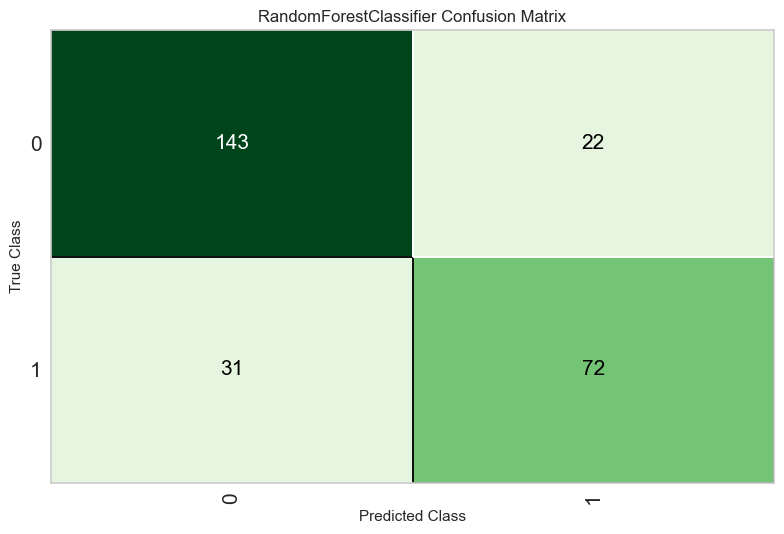

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8148,0.8872,0.7368,0.7706,0.7534,0.6052,0.6056


   pclass  sex   age  sibsp  parch       fare  embarked    who  adult_male  \
0       3    0  22.0      1      0   7.250000         2    man        True   
1       1    1  38.0      1      0  71.283302         0  woman       False   
2       3    1  26.0      0      0   7.925000         2  woman       False   
3       1    1  35.0      1      0  53.099998         2  woman       False   
4       3    0  35.0      0      0   8.050000         2    man        True   

   alone  survived  prediction_label  prediction_score  
0  False         0                 0            0.8248  
1  False         1                 1            0.9697  
2   True         1                 1            0.6692  
3  False         1                 1            0.9477  
4   True         0                 0            0.8259  


In [1]:
# 從 Seaborn 提供的資料集加載
import pandas as pd
from pycaret.classification import *
import seaborn as sns
data = sns.load_dataset('titanic')

# 確認資料
print(data.head())
# 刪除不必要的特徵
data = data.drop(['deck', 'embark_town', 'alive', 'class'], axis=1)

# 填補缺失值
data['age'] = data['age'].fillna(data['age'].median())
data['embarked'] = data['embarked'].fillna(data['embarked'].mode()[0])

# 類別編碼
data['sex'] = data['sex'].map({'male': 0, 'female': 1})
data['embarked'] = data['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# 確認處理後的資料
print(data.isnull().sum())
# PyCaret 環境設置
# PyCaret 環境設置
clf1 = setup(data=data, 
             target='survived', 
             session_id=123,
             normalize=True, 
             transformation=True, 
             remove_multicollinearity=True,
             multicollinearity_threshold=0.95, 
            )


# 模型比較
best_model = compare_models()
# 選擇最好的模型（可以手動指定模型，例如 "Random Forest"）
model = create_model('rf')

# 超參數調整
tuned_model = tune_model(model, optimize='Accuracy')

# 評估模型
plot_model(tuned_model, plot='confusion_matrix')
# 保存模型
save_model(tuned_model, 'titanic_model')

# 加載模型
loaded_model = load_model('titanic_model')
# 測試數據的預測
predictions = predict_model(tuned_model, data=data)
print(predictions.head())
